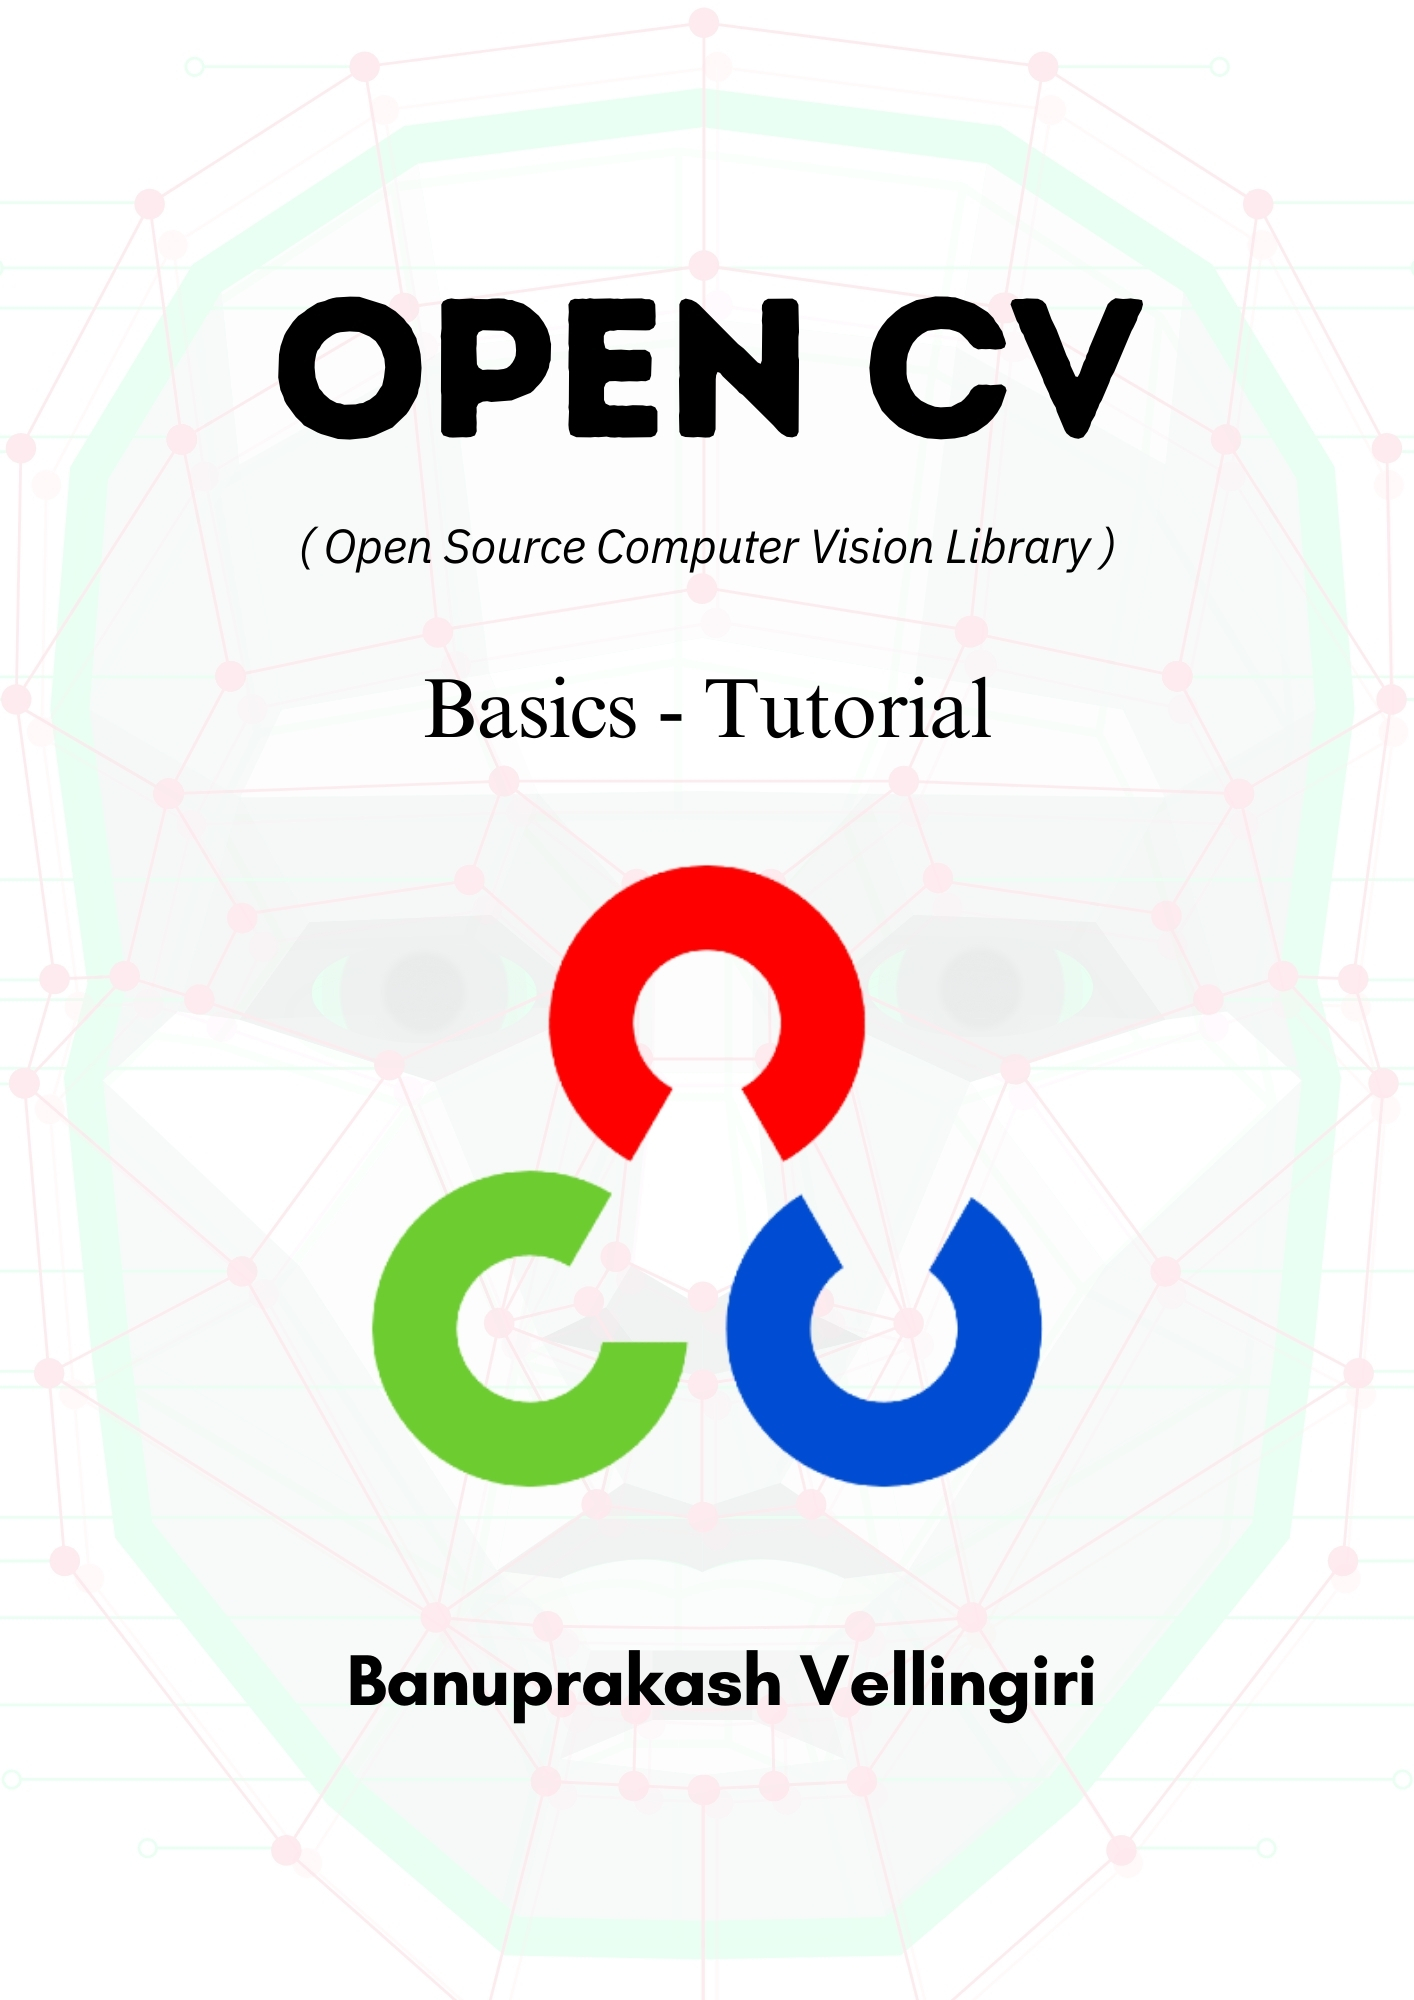


# ___1. Basic Concepts___

### Loading Image and Video :

In [ ]:
#load image
import cv2 as cv
image=cv.imread("dog.jpg")
cv.imshow("dog",image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#Load video
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)
#---------------------------------------------------------------
if not capture.isOpened():
    print("Error: Could not open video.")
    exit()
#---------------------------------------------------------------
while True:
    read, frame = capture.read()
    if not read:
        break
    cv.imshow('Video', frame)
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
#---------------------------------------------------------------
capture.release()
cv.destroyAllWindows()

### Shape :

In [ ]:
#image shape
import cv2 as cv
image=cv.imread("dog.jpg")
#---------------------------------------------------------------
height, width, _ = image.shape
#---------------------------------------------------------------
print("Image resolution: {}x{}".format(width, height))

In [ ]:
#video shape
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)
#---------------------------------------------------------------
width = int(capture .get(cv.CAP_PROP_FRAME_WIDTH))
height = int(capture .get(cv.CAP_PROP_FRAME_HEIGHT))
#---------------------------------------------------------------
print("Video resolution: {}x{}".format(width, height))

-      width = int(capture.get(cv.CAP_PROP_FRAME_WIDTH))
-      height = int(capture.get(cv.CAP_PROP_FRAME_HEIGHT))
-      fps = capture.get(cv.CAP_PROP_FPS)

###  Reshaping / Rescaling :


In [ ]:
#image
import cv2 as cv
image = cv.imread("dog.jpg")
#---------------------------------------------------------------
new_width = 640
new_height = 480

resized_image = cv.resize(image, (new_width, new_height))
#resized_image = cv.resize(image, (500,500), interpolation=cv.INTER_CUBIC)
#---------------------------------------------------------------
cv.imshow('Resized Image', resized_image)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
#video
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)
#---------------------------------------------------------------
new_width = 300
new_height = 300
while True:
    read, frame = capture.read()
    #---------------------------------------------------------------
    resized_frame = cv.resize(frame, (new_width, new_height))
    cv.imshow('Video', resized_frame)
    #---------------------------------------------------------------          
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
#---------------------------------------------------------------
capture.release()
cv.destroyAllWindows()

### Different Types of Colour Conversion :

| Color Format          | Conversion Code    |
|-----------------------|--------------------|
| BGR (Blue-Green-Red)  |                    |
|                       | `cv2.COLOR_BGR2RGB`: Convert from BGR to RGB.     |
|                       | `cv2.COLOR_BGR2GRAY`: Convert from BGR to grayscale. |
|                       | `cv2.COLOR_BGR2HSV`: Convert from BGR to HSV (Hue, Saturation, Value). |
|                       | `cv2.COLOR_BGR2LAB`: Convert from BGR to CIELAB. |
|-----------------------|--------------------|
| RGB (Red-Green-Blue)  |                    |
|                       | `cv2.COLOR_RGB2BGR`: Convert from RGB to BGR.     |
|                       | `cv2.COLOR_RGB2GRAY`: Convert from RGB to grayscale. |
|                       | `cv2.COLOR_RGB2HSV`: Convert from RGB to HSV. |
|                       | `cv2.COLOR_RGB2LAB`: Convert from RGB to CIELAB. |
|-----------------------|--------------------|
| Grayscale             |                    |
|                       | `cv2.COLOR_GRAY2BGR`: Convert from grayscale to BGR. |
|                       | `cv2.COLOR_GRAY2RGB`: Convert from grayscale to RGB. |
|                       | `cv2.COLOR_GRAY2HSV`: Convert from grayscale to HSV. |
|-----------------------|--------------------|
| HSV (Hue, Saturation, Value) |            |
|                       | `cv2.COLOR_HSV2BGR`: Convert from HSV to BGR. |
|                       | `cv2.COLOR_HSV2RGB`: Convert from HSV to RGB. |
|                       | `cv2.COLOR_HSV2GRAY`: Convert from HSV to grayscale. |
|-----------------------|--------------------|
| LAB (CIELAB)          |                    |
|                       | `cv2.COLOR_LAB2BGR`: Convert from CIELAB to BGR. |
|                       | `cv2.COLOR_LAB2RGB`: Convert from CIELAB to RGB. |
|                       | `cv2.COLOR_LAB2GRAY`: Convert from CIELAB to grayscale. |


Note :
- Grayscale to HSV = First Grayscale to BGR and then BGR to HSV
- Grayscale to LAB = First Grayscale to BGR and then BGR to LAB

In [ ]:
#image
import cv2 as cv
image = cv.imread("dog.jpg")
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow('Grayscale Image', gray_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#video
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)     
#---------------------------------------------------------------     
while True:
    read, frame = capture.read()
    converted_frame = cv.cvtColor(frame, cv.COLOR_RGB2HSV)
    cv.imshow('Converted Video', converted_frame)
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
capture.release()
cv.destroyAllWindows()

### Blur :

In [ ]:
#image
import cv2 as cv
image= cv.imread("dog.jpg")
#---------------------------------------------------------------     
#kernel_size (window )= (15, 15)
average_blur_image=cv.blur(image,(9,9)) # Average blur
median_blur_image=cv.medianBlur(image,9) # Median blur #Looks like painted image
gaussian_blur_image= cv.GaussianBlur(image, (9,9), cv.BORDER_DEFAULT) # Gaussian blur  --Lokings more natural than average blur
bilateral_blur_image= cv.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75) # Bilateral Blur preserves edges while reducing noise
#---------------------------------------------------------------     
cv.imshow('Average Blur Image', average_blur_image)
cv.imshow('Median Blur Image', median_blur_image)
cv.imshow('Gaussian Blur Image', gaussian_blur_image)
cv.imshow('Bilateral Blur Image', bilateral_blur_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#video
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)     
#---------------------------------------------------------------     
while True:
    read, frame = capture.read()
    blurred_frame = cv.blur(frame, (15, 15))
    cv.imshow('Blurred Video', blurred_frame)
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
capture.release()
cv.destroyAllWindows()

### Crop :

In [ ]:
#image
import cv2 as cv
image= cv.imread("dog.jpg")
#---------------------------------------------------------------
# x, y, width, height = 100, 100, 200, 200
# image[y:y+height, x:x+width]   
cropped_image = image[50:200, 200:400]
#---------------------------------------------------------------   
cv.imshow('Cropped', cropped_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#video
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)     
#---------------------------------------------------------------     
while True:
    read, frame = capture.read()
    cropped_frame= frame[50:200, 200:400]
    cv.imshow('Blurred Video',cropped_frame)
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
capture.release()
cv.destroyAllWindows()

### Edge Cascade :

In [ ]:
#image
import cv2 as cv
image= cv.imread("dog.jpg")
#---------------------------------------------------------------
cascaded_image = cv.Canny(image, 153, 155)
#---------------------------------------------------------------   
cv.imshow('Edge cascaded iamge',cascaded_image )
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#video
import cv2 as cv
video_path = 'dog.mp4'
capture = cv.VideoCapture(video_path)     
#---------------------------------------------------------------     
while True:
    read, frame = capture.read()
    cascaded_frame = cv.Canny(frame, 125, 175)
    cv.imshow('Egde cascaded video ',cascaded_frame)
    if cv.waitKey(25) & 0xFF == ord('q'):
        break
capture.release()
cv.destroyAllWindows()

 ### Dilation : 

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
image = cv.imread('dog.jpg')
kernel = (5, 5)
dilated_image = cv.dilate(image, kernel, iterations=3)
#---------------------------------------------------------------
cv.imshow('Dilated Image', dilated_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#image
import cv2 as cv
image = cv.imread("dog.jpg")
#---------------------------------------------------------------
#For RGB image
b, g, r = cv.split(image)
# Perform dilation on each channel
dilated_b = cv.dilate(b, (7, 7), iterations=10) #kernal=(7,7)
dilated_g = cv.dilate(g, (7, 7), iterations=3)
dilated_r = cv.dilate(r, (7, 7), iterations=3)
#---------------------------------------------------------------
dilated_image = cv.merge((dilated_b, dilated_g, dilated_r))   
cv.imshow('Dilated image',dilated_image )
cv.waitKey(0)
cv.destroyAllWindows()

 ### Eroding  : 

In [ ]:
#image
import cv2 as cv
image = cv.imread("dog.jpg")
#---------------------------------------------------------------
eroded_image= cv.erode(image, (18,18), iterations=10)
#---------------------------------------------------------------   
cv.imshow('Eroded image',eroded_image )
cv.waitKey(0)
cv.destroyAllWindows()

### Drawing Shapes :

1. Black Image :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank(black)image 
blank_image=np.zeros((500,500),dtype="uint8")
cv.imshow("blank_image",blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

2. White Image :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank(black)image 
blank_image=np.zeros((500,500),dtype="uint8")
blank_image[:,:]=255
cv.imshow("blank_image",blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

3. RGB Image : 

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
blank_image=np.zeros((500,500,3),dtype="uint8")
blank_image[:,:,2]=255 # Blue=0,Green=1,Red=2
# image[:,:]=0,255,0 (255,0,0 or 0,255,0 or 0,0,255)
#---------------------------------------------------------------
cv.imshow("blank_image",blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

4. Colour Box Inside Black Image :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a box inside the image
blank_image[1:300, 200:500] = 255,0,255 #ROI=region of interest
#---------------------------------------------------------------
cv.imshow('customized image', blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a box inside the image
blank_image[1:300, 200:500] = 255,0,255 #ROI=Region Of Interest
blank_image[300:500, 200:500] = 67,0,26
#---------------------------------------------------------------
cv.imshow('customized image', blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

5. Square / Rectangle :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a rectangle
rectangle=cv.rectangle(blank_image,(0,0),(200,200),(0,255,255),thickness=2) #if thickness=-1 it fills the rectangle
#---------------------------------------------------------------
cv.imshow('Rectangle', rectangle)
cv.waitKey(0)
cv.destroyAllWindows()

6. Circle :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a circle
circle=cv.circle(blank_image,(250,250),50,(255,0,190),thickness=-1)
#---------------------------------------------------------------
cv.imshow('Circle', circle)
cv.waitKey(0)
cv.destroyAllWindows()

7. Line :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a line
line=cv.line(blank_image,(200,200),(300,300),(190,20,230),thickness=2)
#---------------------------------------------------------------
cv.imshow('Line', line)
cv.waitKey(0)
cv.destroyAllWindows()

8. Text :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
#Creating a blank black image
blank_image= np.zeros((500,500,3), dtype='uint8')
#---------------------------------------------------------------
#Creating a text
cv.putText(blank_image,"Banuprakash Vellingiri",(50,250),cv.FONT_HERSHEY_TRIPLEX, 1.0, (80,189,80), 1)
#cv2.putText(image, 'Text', (x, y), cv2.FONT_HERSHEY_SIMPLEX, fontScale, color, thickness)
#---------------------------------------------------------------
cv.imshow('Text', blank_image)
cv.waitKey(0)
cv.destroyAllWindows()

| Font Type                           | Description                                     |
|-------------------------------------|-------------------------------------------------|
| `cv2.FONT_HERSHEY_SIMPLEX`         | Normal size sans-serif font.                    |
| `cv2.FONT_HERSHEY_PLAIN`           | Small size sans-serif font.                     |
| `cv2.FONT_HERSHEY_DUPLEX`          | Normal size sans-serif font (more complex).     |
| `cv2.FONT_HERSHEY_COMPLEX`         | Normal size serif font.                         |
| `cv2.FONT_HERSHEY_TRIPLEX`         | Normal size serif font (more complex).          |
| `cv2.FONT_HERSHEY_COMPLEX_SMALL`   | Smaller version of `FONT_HERSHEY_COMPLEX`.     |
| `cv2.FONT_HERSHEY_SCRIPT_SIMPLEX`  | Handwriting style font (simplex).               |
| `cv2.FONT_HERSHEY_SCRIPT_COMPLEX`  | Handwriting style font (complex).               |


### Translation : 

In [ ]:
#Translate from left
import cv2 as cv
import numpy as np
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
tx = 50  # Shift along x-axis (positive moves right, negative moves left)
ty = 100 # Shift along y-axis (positive moves down, negative moves up)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
# Apply translation to the image
translated_image = cv.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
#---------------------------------------------------------------
cv.imshow('Translated Image', translated_image)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
#Translate from right
import cv2 as cv
import numpy as np
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
tx = -50  # Shift along x-axis (positive moves right, negative moves left)
ty = -100 # Shift along y-axis (positive moves down, negative moves up)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
#---------------------------------------------------------------
cv.imshow('Translated Image', translated_image)
cv.waitKey(0)
cv.destroyAllWindows()

### Rotation : 

In [ ]:
import cv2 as cv
import numpy as np
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
angle = 70 # Rotation angle in degrees (70 = clockwise or -70 = anticlockwise)
center =(250,250)
rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)  #1.0=Zoom
rotated_image = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
#---------------------------------------------------------------
cv.imshow('Rotated Image', rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()


### Flipping :

In [ ]:
import cv2 as cv
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
flipped_horizontal = cv.flip(image, 1)
flipped_vertical = cv.flip(image, 0)
flipped_both = cv.flip(image, -1)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
cv.imshow('Flipped Horizontally', flipped_horizontal)
cv.imshow('Flipped Vertically', flipped_vertical)
cv.imshow('Flipped Both', flipped_both)
cv.waitKey(0)
cv.destroyAllWindows()


# ___2. Advanced Concepts___

### Contours (boundary of objects in image) :

In [16]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
image = cv.imread('dog.jpg', cv.IMREAD_GRAYSCALE) # Must be Grayscale for contours
#---------------------------------------------------------------
_, binary_image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#---------------------------------------------------------------
# Draw contours on a blank image
contour_image = np.zeros_like(image) #creating the blank image with same size as original dog image
cv.drawContours(contour_image, contours, -1, (255, 255, 255), 1)
#---------------------------------------------------------------
cv.imshow('Contours', contour_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#Drawing contours on top original color image
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
image = cv.imread('dog.jpg', cv.IMREAD_GRAYSCALE) #Must be grayscale for contours
#---------------------------------------------------------------
_, binary_image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#---------------------------------------------------------------
# Draw contours on original colour image
image_color=cv.imread("dog.jpg")
cv.drawContours(image_color, contours, -1, (90, 25, 255), 2)
#---------------------------------------------------------------
cv.imshow('Contours', image_color)
cv.waitKey(0)
cv.destroyAllWindows()

### Splitting  Color Channels :

In [ ]:
import cv2 as cv
image = cv.imread('cat.jpg')
#---------------------------------------------------------------
blue, green, red = cv.split(image)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
cv.imshow('Blue Channel', blue)
cv.imshow('Green Channel', green)
cv.imshow('Red Channel', red)
cv.waitKey(0)
cv.destroyAllWindows()


### Merging Images :

In [ ]:
import cv2 as cv
image = cv.imread('cat.jpg')
#---------------------------------------------------------------
blue, green, red = cv.split(image)
#---------------------------------------------------------------
merged_image = cv.merge([blue, green, red])
#---------------------------------------------------------------
cv.imshow('Blue Channel', blue)
cv.imshow('Green Channel', green)
cv.imshow('Red Channel', red)
cv.imshow('Merged Image', merged_image)
cv.waitKey(0)
cv.destroyAllWindows()


### Advanced Blur :

1. Custom Blur :

In [ ]:
#Custom blur
import cv2
import numpy as np
image = cv2.imread('cat.jpg')
#---------------------------------------------------------------
custom_kernel = np.array([[0.1, 0.1, 0.1],
                          [0.1, 0.2, 0.1],
                          [0.1, 0.1, 0.1]])
custom_blurred_image = cv2.filter2D(image, -1, custom_kernel)
#---------------------------------------------------------------
cv.imshow('Custom Blur Image', custom_blurred_image)
cv.waitKey(0)
cv.destroyAllWindows()

2. Motion Blur :

In [ ]:
#Motion Blur
import cv2
import numpy as np
image = cv2.imread('cat.jpg')
#---------------------------------------------------------------
kernel_size = 15
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion_blur /= kernel_size
motion_blur = cv2.filter2D(image, -1, kernel_motion_blur)
#---------------------------------------------------------------
cv.imshow('Motion Blur Image', motion_blur )
cv.waitKey(0)
cv.destroyAllWindows()


### Bitwise Operators :

1. For Single Channel Image (Grayscale Image) :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
# Create a blank image
blank_image = np.zeros((500,500), dtype='uint8')
#---------------------------------------------------------------
# Draw a rectangle
rectangle = cv.rectangle(blank_image.copy(), (30,30), (370,370), (255,255,255), thickness=-1)
#---------------------------------------------------------------
# Draw a circle
circle = cv.circle(blank_image.copy(), (200,200), 200, (255,255,255), thickness=-1)
#---------------------------------------------------------------
# Bitwise operations
bitwise_and = cv.bitwise_and(rectangle, circle)  # AND >>> intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)    # OR  >>> non-intersecting and intersecting regions
bitwise_xor = cv.bitwise_xor(rectangle, circle)  # XOR >>> non-intersecting regions
bitwise_not_rect = cv.bitwise_not(rectangle)     # NOT >>> taken region is removed #inversion happens(black changes to white and white changes to black)
bitwise_not_circ = cv.bitwise_not(circle)
#---------------------------------------------------------------
# Display images
cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)
cv.imshow('Bitwise AND', bitwise_and)
cv.imshow('Bitwise OR', bitwise_or)
cv.imshow('Bitwise XOR', bitwise_xor)
cv.imshow('Bitwise NOT Rectangle', bitwise_not_rect)
cv.imshow('Bitwise NOT Circle', bitwise_not_circ)
cv.waitKey(0)
cv.destroyAllWindows()


2. For three channel image (RGB) :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
# Create a blank image with 3 channels (RGB)
blank_image = np.zeros((500, 500, 3), dtype='uint8')
#---------------------------------------------------------------
# Draw a rectangle  on the blank image
rectangle = cv.rectangle(blank_image.copy(), (30, 30), (370, 370), (0, 255, 255), thickness=-1)
#---------------------------------------------------------------
# Draw a circle  on the blank image
circle = cv.circle(blank_image.copy(), (200, 200), 200, (255, 0, 255), thickness=-1)
#---------------------------------------------------------------
# Bitwise operations
bitwise_and = cv.bitwise_and(rectangle, circle)
bitwise_or = cv.bitwise_or(rectangle, circle)
bitwise_xor = cv.bitwise_xor(rectangle, circle)
bitwise_not_rect = cv.bitwise_not(rectangle)
bitwise_not_circ = cv.bitwise_not(circle)
#---------------------------------------------------------------
# Display images
cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)
cv.imshow('Bitwise AND', bitwise_and)
cv.imshow('Bitwise OR', bitwise_or)
cv.imshow('Bitwise XOR', bitwise_xor)
cv.imshow('Bitwise NOT Rectangle', bitwise_not_rect)
cv.imshow('Bitwise NOT Circle', bitwise_not_circ)
cv.waitKey(0)
cv.destroyAllWindows()

### Masking :

In [ ]:
import cv2 as cv
import numpy as np
#---------------------------------------------------------------
image= cv.imread('family.jpg')
#---------------------------------------------------------------
#Creating a blank image with same as the input image size (image.shape[:2]=(427, 640)) single channel image
blank_image = np.zeros(image.shape[:2], dtype='uint8')
#---------------------------------------------------------------
circle = cv.circle(blank_image.copy(), (image.shape[1]//2 +100,image.shape[0]//2), 60, 255, -1) 
rectangle=cv.rectangle(blank_image,(180,120),(290,300),255,thickness=-1)
#---------------------------------------------------------------
circle_masked_image= cv.bitwise_and(image,image,mask=circle)
rectangle_masked_image= cv.bitwise_and(image,image,mask=rectangle)
#---------------------------------------------------------------
cv.imshow('family', image)
cv.imshow('Circle Masked Image', circle_masked_image)
cv.imshow('Rectangle Masked Image', rectangle_masked_image)
cv.waitKey(0)
cv.destroyAllWindows()

### Histogram Computation :
- Histogram computation refers to the process of calculating the frequency distribution of pixel intensities in an image. In simpler terms, it tells you how many pixels in the image have a certain intensity level.

1. For Grayscale Image :

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#---------------------------------------------------------------
# Compute the histogram
histogram = cv.calcHist([gray_image], [0], None, [256], [0, 256])
#---------------------------------------------------------------
cv.imshow('Original Image', image)
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

2. For RGB Image :

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
image = cv.imread('dog.jpg')
#---------------------------------------------------------------
channels = cv.split(image)
#---------------------------------------------------------------
histograms = []
for channel in channels:
    histogram = cv.calcHist([channel], [0], None, [256], [0, 256])
    histograms.append(histogram)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
# Plot the histograms
colors = ('b', 'g', 'r')
plt.figure()
plt.title('Histograms for RGB Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
#---------------------------------------------------------------
for i, color in enumerate(colors):
    plt.plot(histograms[i], color=color)
plt.legend(['Blue', 'Green', 'Red'])
plt.show()

### Thresholding :
- Thresholding is a fundamental technique in image processing used to create binary images from grayscale images. It involves setting pixel values in an image to certain predefined values based on whether their intensity is above or below a specified threshold.

1. Simple Thresholding :

In [29]:
import cv2 as cv
#---------------------------------------------------------------
image_gray = cv.imread('family.jpg', cv.IMREAD_GRAYSCALE)
#---------------------------------------------------------------
# Apply thresholding
threshold_value = 150 # Threshold value (adjust as needed)
max_value = 255  # Maximum value for pixels above the threshold
_, thresholded_image = cv.threshold(image_gray, threshold_value, max_value, cv.THRESH_BINARY)
#Inverse thresholding (B2W and W2B)
_, thresholded_image_inverse = cv.threshold(image_gray, threshold_value, max_value, cv.THRESH_BINARY_INV)
#---------------------------------------------------------------
cv.imshow('Original Image', image_gray)
cv.imshow('Thresholded Image', thresholded_image)
cv.imshow('Inverse Thresholded Image', thresholded_image_inverse)
cv.waitKey(0)
cv.destroyAllWindows()

2. Adaptive Thresholding (optimum threshold value is finded by itself ) :
- Adaptive thresholding is a technique used in image processing to binarize images by automatically calculating the threshold value for each pixel based on the local neighborhood of that pixel. This method is particularly useful for images with non-uniform illumination.

In [28]:
import cv2 as cv
image = cv.imread('family.jpg', cv.IMREAD_GRAYSCALE)
#---------------------------------------------------------------
adaptive_thresholding = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# Invert the thresholded image (B2W and W2B)
adaptive_thresholding_inverse = cv.bitwise_not(adaptive_thresholding)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
cv.imshow('Adaptive Thresholded Image', adaptive_thresholding)
cv.imshow('Inverse Adaptive Thresholded Image', adaptive_thresholding_inverse)
cv.waitKey(0)
cv.destroyAllWindows()

### Advanced Edge Detection :

Laplacian Method:

In [33]:
import cv2 as cv
image = cv.imread('family.jpg', cv.IMREAD_GRAYSCALE)  
#---------------------------------------------------------------
# Apply Laplacian edge detection
laplacian = cv.Laplacian(image, cv.CV_64F)
# Convert the result to the uint8 data type
laplacian = cv.convertScaleAbs(laplacian)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
cv.imshow('Laplacian Edge Detected Image', laplacian)
cv.waitKey(0)
cv.destroyAllWindows()

Sobel Method :

In [37]:
import cv2 as cv
image = cv.imread('family.jpg', cv.IMREAD_GRAYSCALE)
#---------------------------------------------------------------
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
#---------------------------------------------------------------
sobel_x_visual = cv.convertScaleAbs(sobel_x)
sobel_y_visual = cv.convertScaleAbs(sobel_y)
sobel_combined = cv.magnitude(sobel_x, sobel_y)
sobel_combined = cv.convertScaleAbs(sobel_combined)
#---------------------------------------------------------------
cv.imshow('Original Image', image)
cv.imshow('Sobel X Gradient', sobel_x_visual)
cv.imshow('Sobel Y Gradient', sobel_y_visual)
cv.imshow('Sobel Edge Detection', sobel_combined)
cv.waitKey(0)
cv.destroyAllWindows()